# Life expectancy 
## Integrantes:
* Francisca Burgos, 201810517-1
* Javiera Gonzalez, 201610518-2
* Jasmin Quiero, 201810516-3
* Nicolas Rivera, 201510504-9
* Felix Vergara, 201510524-3

## Nombre del profesor y ayudante:
* Francisco Alfaro
* Eric Zepeda

# Definición del problema
## Contexto:
Estudios en el pasado:

*   Distintas variables
*   No se considera inmunización ni índice de desarrollo
*   Se consideró un conjunto de datos de un año
 

## Motivacion
Realizar un estudio considerando:

*   Indices de inmunización para distintas enfermedades
*   Indice de desarrollo
*   Tasas de mortalidad
*   Factores económicos
*   Factores sociales
*   Datos de un periodo de 15 años (2000-2015)

## Data

*   Datos obtenidos de el sitio de la OMS
*   2000-2015 para 193 países 
*   Archivos de datos individuales se han fusionado en un solo conjunto de datos. 
*  Inspección visual inicial de los datos muestra valores faltantes, en su mayoría de  la población, la hepatitis B y el PIB, de países menos conocidos, los cuales fueron excluidos.

archivo combinado final: 22 columnas y 2938 filas, lo que significa 20 variables de predicción.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold
from numpy import arange
from warnings import filterwarnings 
filterwarnings("ignore")

In [2]:
# metrics 

import numpy as np 
import pandas as pd

# metrics


def mae(targets, predictions) -> float:
    """
    Calculo de la metrica: mean absolute error (MAE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    return round(np.abs(error).mean(), 4)


def mse(targets, predictions) -> float:
    """
    Calculo de la metrica: mean squared error (MSE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    return round((error ** 2).mean(), 4)


def rmse(targets, predictions) -> float:
    """
    Calculo de la metrica: root mean squared error (RMSE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    return round(np.sqrt((error ** 2).mean()), 4)


# b) Percentage errors

def mape(targets, predictions) -> float:
    """
    Calculo de la metrica: mean absolute percentage error (MAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets

    if any(x == 0 for x in targets):
        return np.inf
    else:
        return round(np.abs(error / targets).mean(),4)


def maape(targets, predictions) -> float:
    """
    Calculo de la metrica:  mean arctangent percentage error  (MAAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """

    error = predictions - targets

    if any((x, y) == (0, 0) for x, y in zip(predictions, targets)):
        return np.inf

    else:
        return round(np.arctan(np.abs(error / targets)).mean(),4)


def wmape(targets, predictions) -> float:
    """
    Calculo de la metrica:  weighted mean absolute percentage error (WMAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    sum_values = np.sum(targets)

    if sum_values == 0:
        return np.inf
    else:
        return round(np.abs(error).sum() / sum_values,4)


def mmape(targets, predictions) -> float:
    """
    Calculo de la metrica: modified mean absolute percentage error (MMAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = np.abs(predictions - targets)
    denom = 1 + np.abs(targets)

    return round(np.mean(error / denom),4)


def smape(targets, predictions) -> float:
    """
    Calculo de la metrica: symmetric mean absolute percentage error (SMAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    sum_values = np.abs(predictions) + np.abs(targets)

    if any(x == 0 for x in sum_values):
        return np.inf

    else:
        return round(2 * np.mean(np.abs(error) / sum_values),4)

def summary_metrics(df) -> pd.DataFrame:
    """
    Aplicar las distintas metricas definidas
    :param df:  dataframe con las columnas: ['y','yhat']
    :return: dataframe con las metricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mae(y_true, y_pred), 4)]
    df_result['mse'] = [round(mse(y_true, y_pred), 4)]
    df_result['rmse'] = [round(rmse(y_true, y_pred), 4)]

    df_result['mape'] = [round(mape(y_true, y_pred), 4)]
    df_result['maape'] = [round(maape(y_true, y_pred), 4)]
    df_result['wmape'] = [round(wmape(y_true, y_pred), 4)]
    df_result['mmape'] = [round(mmape(y_true, y_pred), 4)]
    df_result['smape'] = [round(smape(y_true, y_pred), 4)]

    # nombre del modelo por defecto
    #try:
    #    model = df['model'][0]
    #    df_result['model'] = [model]
    #except:
    #    df_result['model'] = ['---']

    return df_result

In [3]:
Life_Expectancy_Data=pd.read_csv(r'/users/felix/desktop/Life Expectancy Data.csv',sep=',')

In [4]:
Life_Expectancy_Data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
data=Life_Expectancy_Data.drop(['Country','Year','Status'],axis=1)

In [6]:
data=data.dropna()

# Estadística descriptiva

In [7]:
data.describe()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


# Visualización descriptiva

<AxesSubplot:ylabel='mean'>

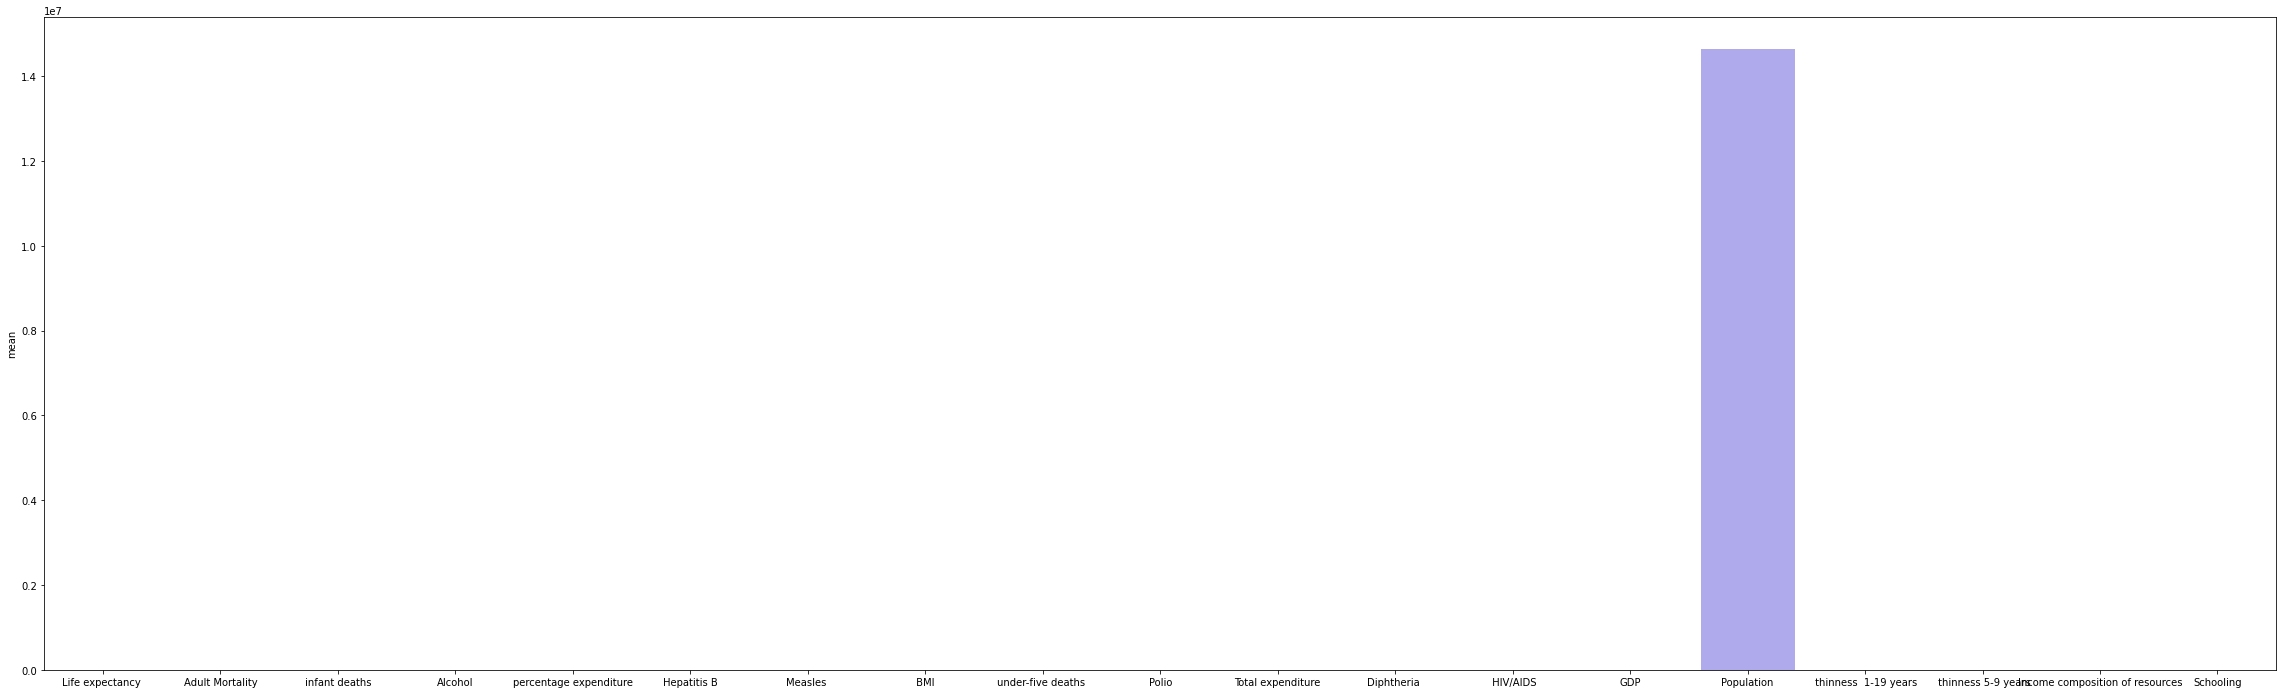

In [8]:
plt.figure(figsize=(40,12))
sns.barplot(x=data.columns,y=data.describe().loc['mean'])

<AxesSubplot:ylabel='mean'>

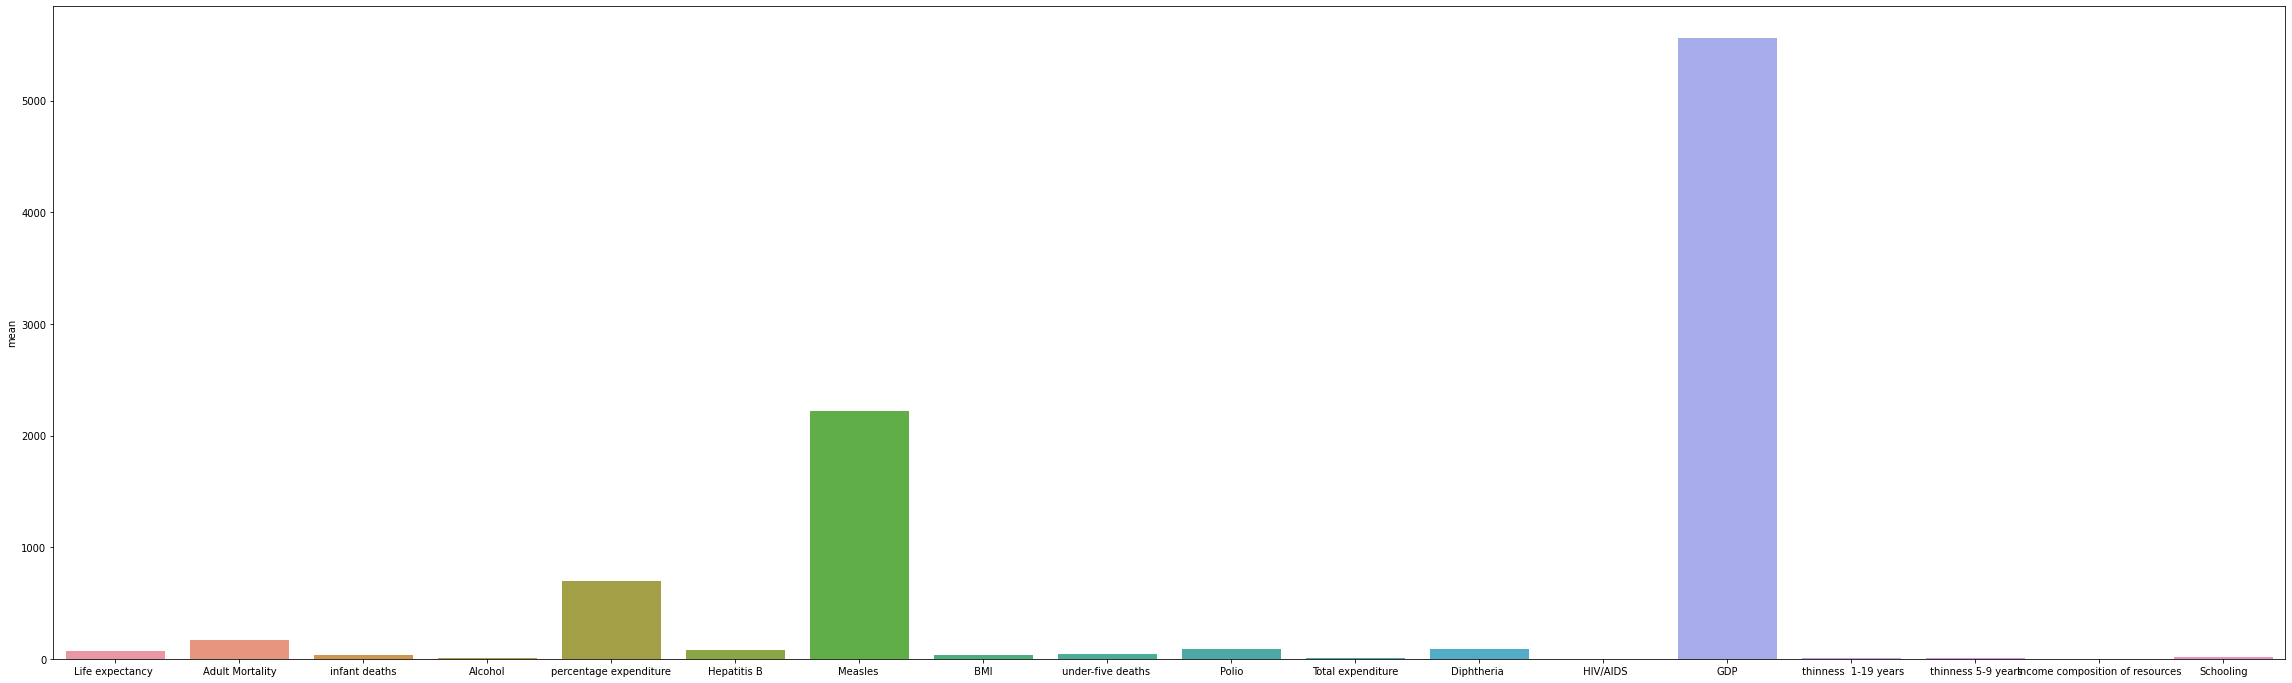

In [9]:
plt.figure(figsize=(40,12))
data_sin_poblacion=data.drop('Population',axis=1)
sns.barplot(x=data_sin_poblacion.columns,y=data_sin_poblacion.describe().loc['mean'])

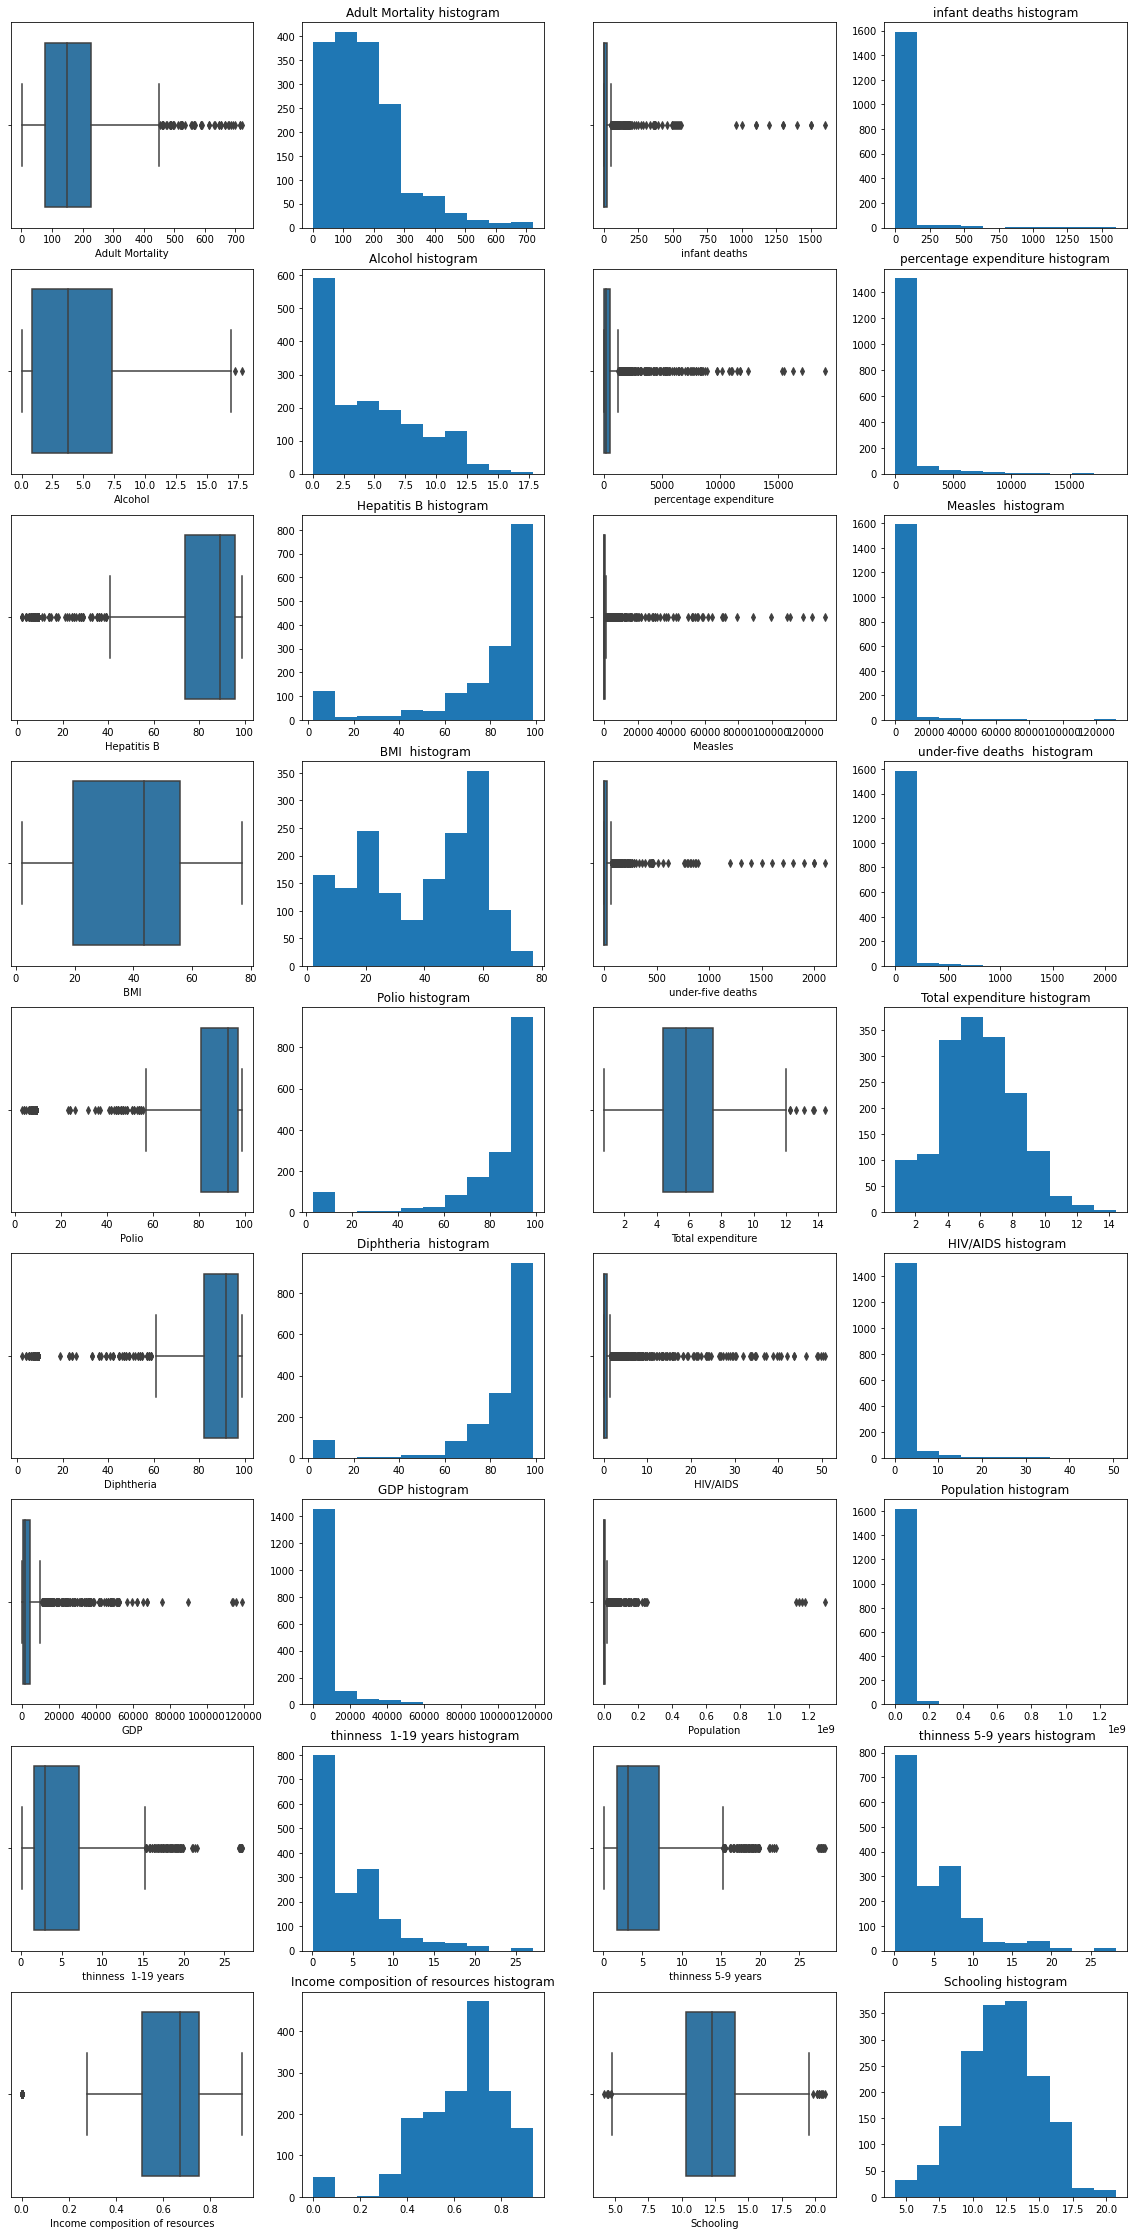

In [10]:
cont_vars = list(data.columns)[1:]
def outliers_visual(data):
    plt.figure(figsize=(20, 40))
    i = 0
    for col in cont_vars:
        i += 1
        plt.subplot(9, 4, i)
        sns.boxplot(data[col])
        i += 1
        plt.subplot(9, 4, i)
        plt.hist(data[col])
        plt.title('{} histogram'.format(col))
    plt.show()
outliers_visual(data)

In [11]:
Life_Expectancy_Data['Status'] = Life_Expectancy_Data['Status'].replace({'Developed':1,'Developing':0}) # target

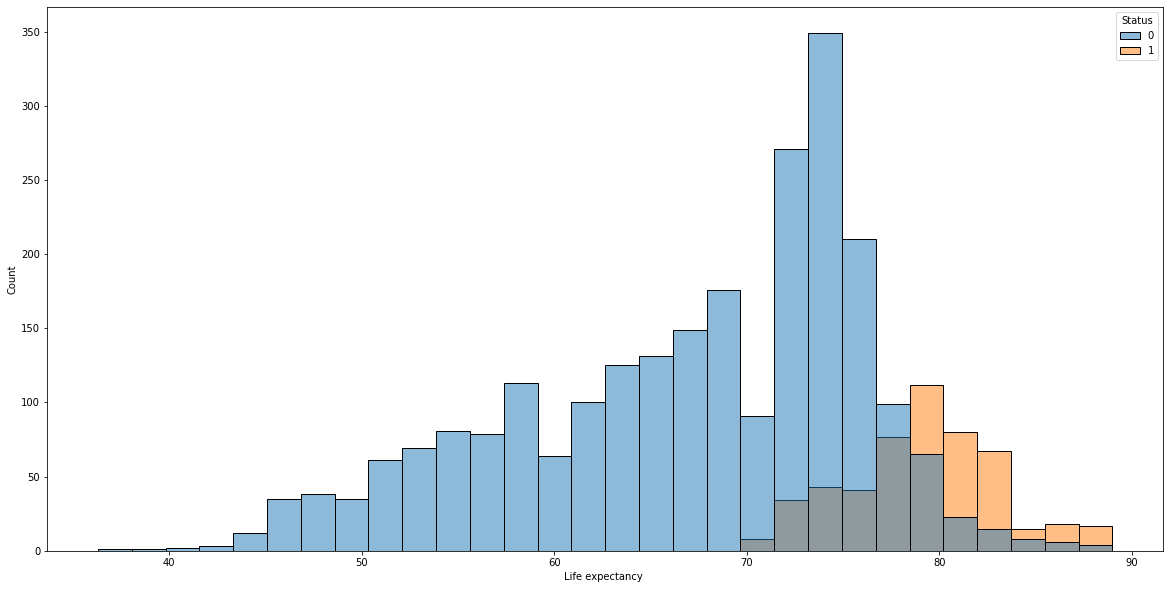

In [12]:
plt.figure(figsize=(20, 10))
sns.histplot(data=Life_Expectancy_Data,x='Life expectancy ',hue='Status')
plt.show()

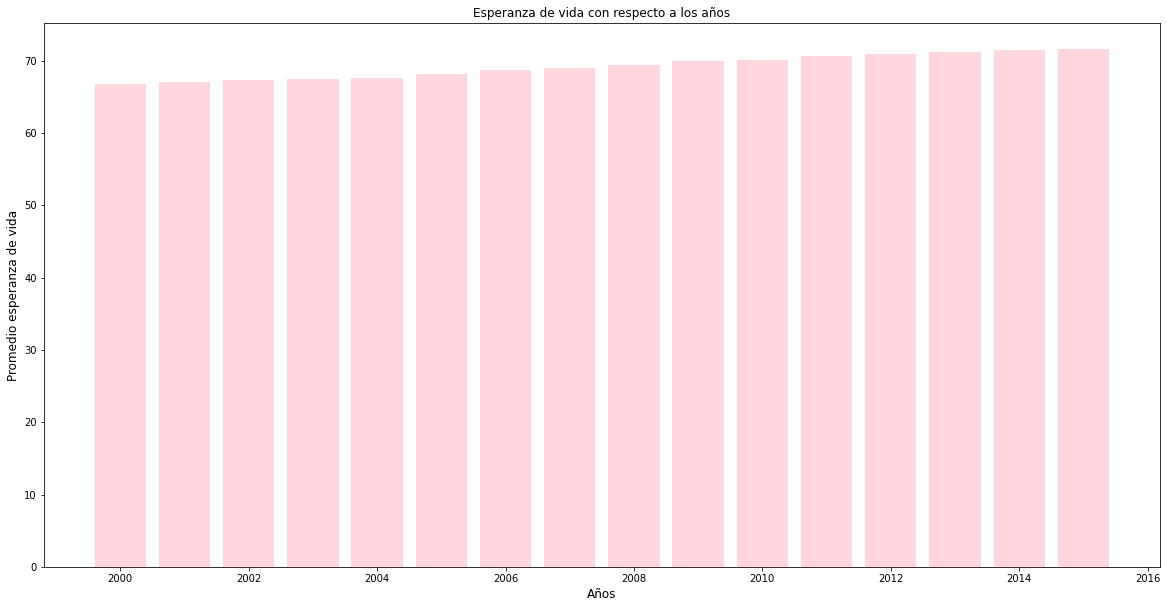

In [13]:
# Life_Expectancy w.r.t Year using bar plot.
plt.figure(figsize=(20,10))
plt.bar(Life_Expectancy_Data.groupby('Year')['Year'].count().index,Life_Expectancy_Data.groupby('Year')['Life expectancy '].mean(),color='pink',alpha=0.65)
plt.xlabel("Años",fontsize=12)
plt.ylabel("Promedio esperanza de vida",fontsize=12)
plt.title("Esperanza de vida con respecto a los años")
plt.show()

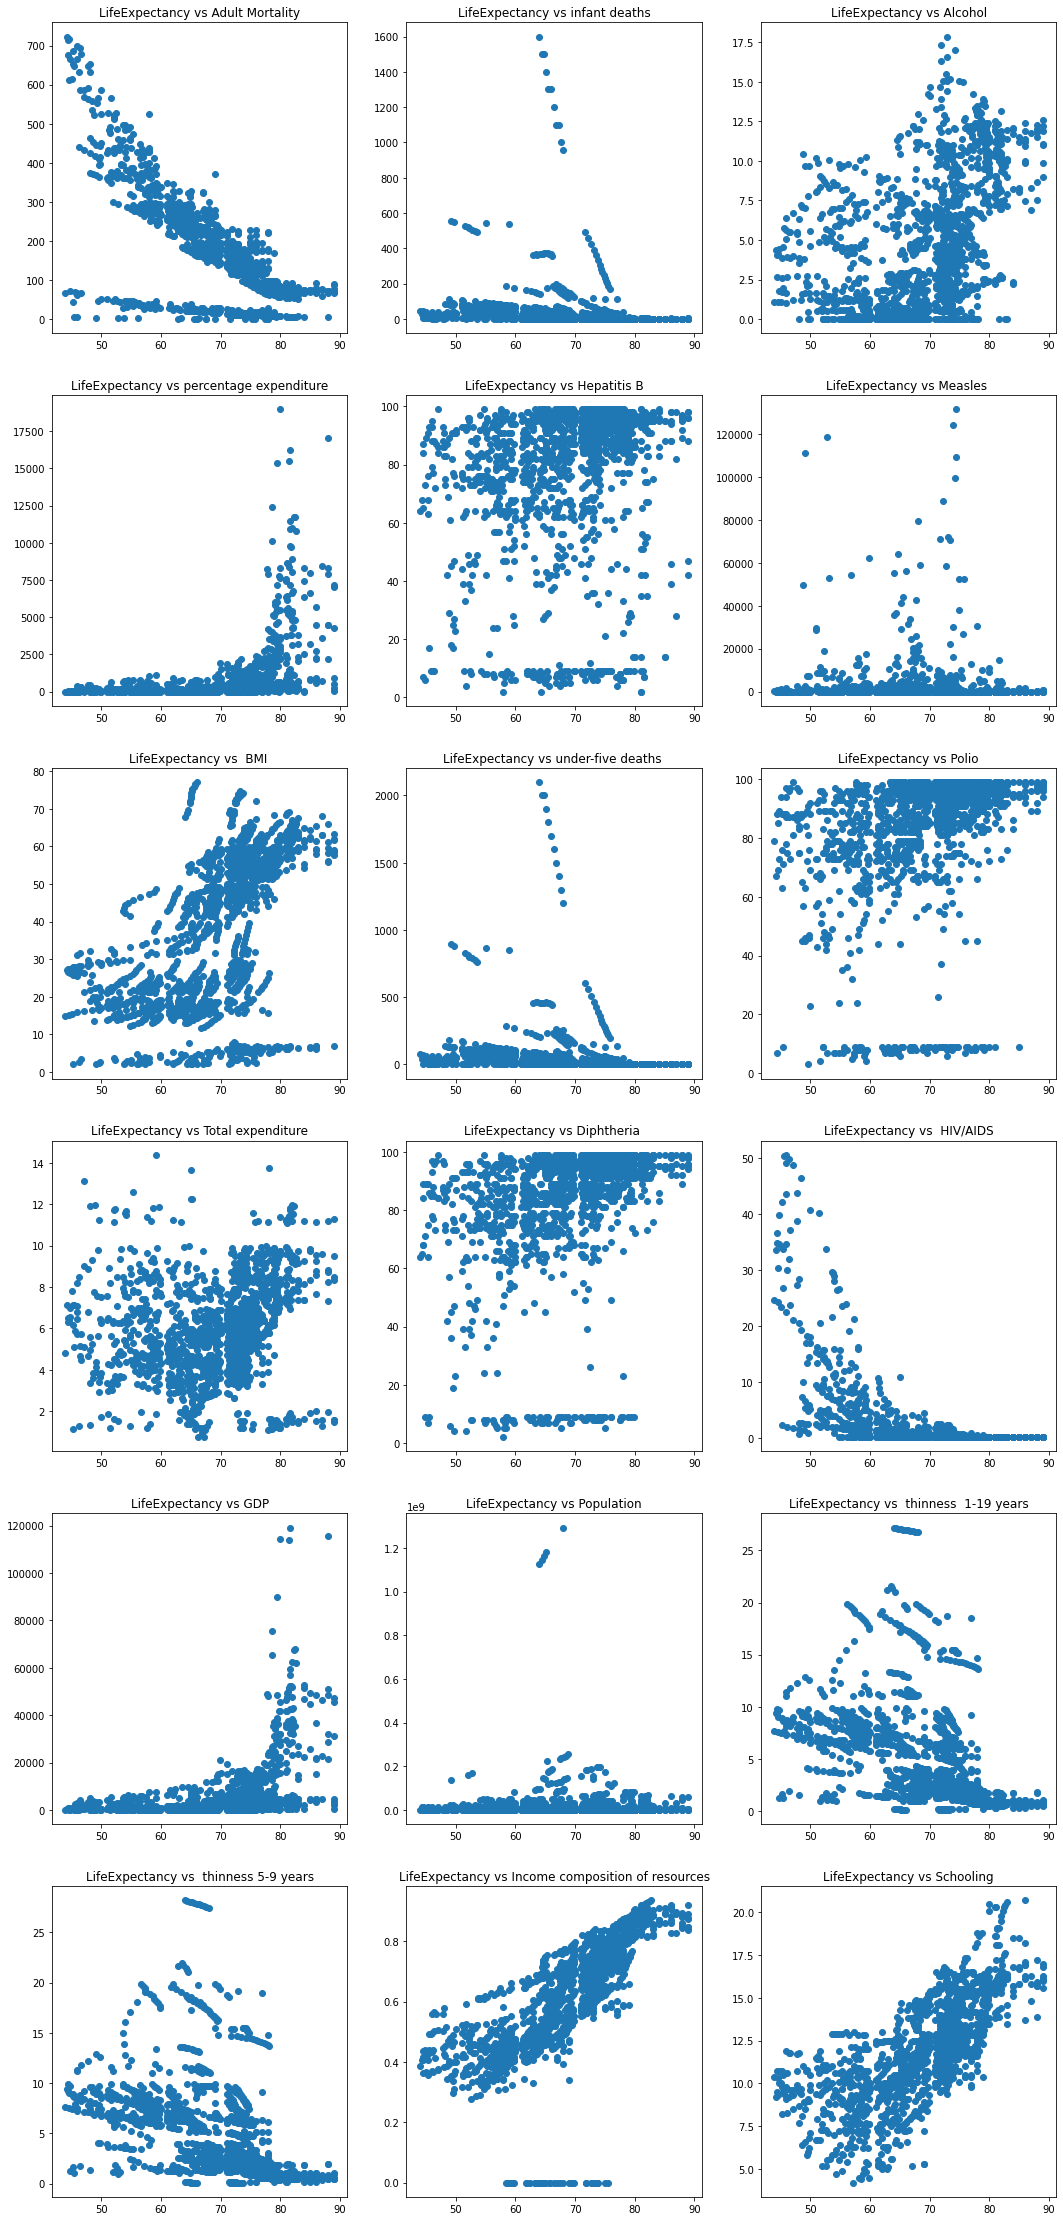

In [14]:
# Scatter plot between the target variable(winsorized_Life_Expectancy) and all continuous variables.
plt.figure(figsize=(18,40))

j=1
for columna in data.columns:
  if columna!='Life expectancy ':
    plt.subplot(6,3,j)
    plt.scatter(data["Life expectancy "], data[columna])
    plt.title("LifeExpectancy vs "+str(columna))
    j+=1
plt.show()


# Preprocesamiento

In [15]:
data.corr()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Life expectancy,1.000000,-0.702523,-0.169074,0.402718,0.409631,0.199935,-0.068881,0.542042,-0.192265,0.327294,0.174718,0.341331,-0.592236,0.441322,-0.022305,-0.457838,-0.457508,0.721083,0.727630
Adult Mortality,-0.702523,1.000000,0.042450,-0.175535,-0.237610,-0.105225,-0.003967,-0.351542,0.060365,-0.199853,-0.085227,-0.191429,0.550691,-0.255035,-0.015012,0.272230,0.286723,-0.442203,-0.421171
infant deaths,-0.169074,0.042450,1.000000,-0.106217,-0.090765,-0.231769,0.532680,-0.234425,0.996906,-0.156929,-0.146951,-0.161871,0.007712,-0.098092,0.671758,0.463415,0.461908,-0.134754,-0.214372
Alcohol,0.402718,-0.175535,-0.106217,1.000000,0.417047,0.109889,-0.050110,0.353396,-0.101082,0.240315,0.214885,0.242951,-0.027113,0.443433,-0.028880,-0.403755,-0.386208,0.561074,0.616975
percentage expenditure,0.409631,-0.237610,-0.090765,0.417047,1.000000,0.016760,-0.063071,0.242738,-0.092158,0.128626,0.183872,0.134813,-0.095085,0.959299,-0.016792,-0.255035,-0.255635,0.402170,0.422088
Hepatitis B,0.199935,-0.105225,-0.231769,0.109889,0.016760,1.000000,-0.124800,0.143302,-0.240766,0.463331,0.113327,0.588990,-0.094802,0.041850,-0.129723,-0.129406,-0.133251,0.184921,0.215182
Measles,-0.068881,-0.003967,0.532680,-0.050110,-0.063071,-0.124800,1.000000,-0.153245,0.517506,-0.057850,-0.113583,-0.058606,-0.003522,-0.064768,0.321946,0.180642,0.174946,-0.058277,-0.115660
BMI,0.542042,-0.351542,-0.234425,0.353396,0.242738,0.143302,-0.153245,1.000000,-0.242137,0.186268,0.189469,0.176295,-0.210897,0.266114,-0.081416,-0.547018,-0.554094,0.510505,0.554844
under-five deaths,-0.192265,0.060365,0.996906,-0.101082,-0.092158,-0.240766,0.517506,-0.242137,1.000000,-0.171164,-0.145803,-0.178448,0.019476,-0.100331,0.658680,0.464785,0.462289,-0.148097,-0.226013
Polio,0.327294,-0.199853,-0.156929,0.240315,0.128626,0.463331,-0.057850,0.186268,-0.171164,1.000000,0.119768,0.609245,-0.107885,0.156809,-0.045387,-0.164070,-0.174489,0.314682,0.350147


<AxesSubplot:>

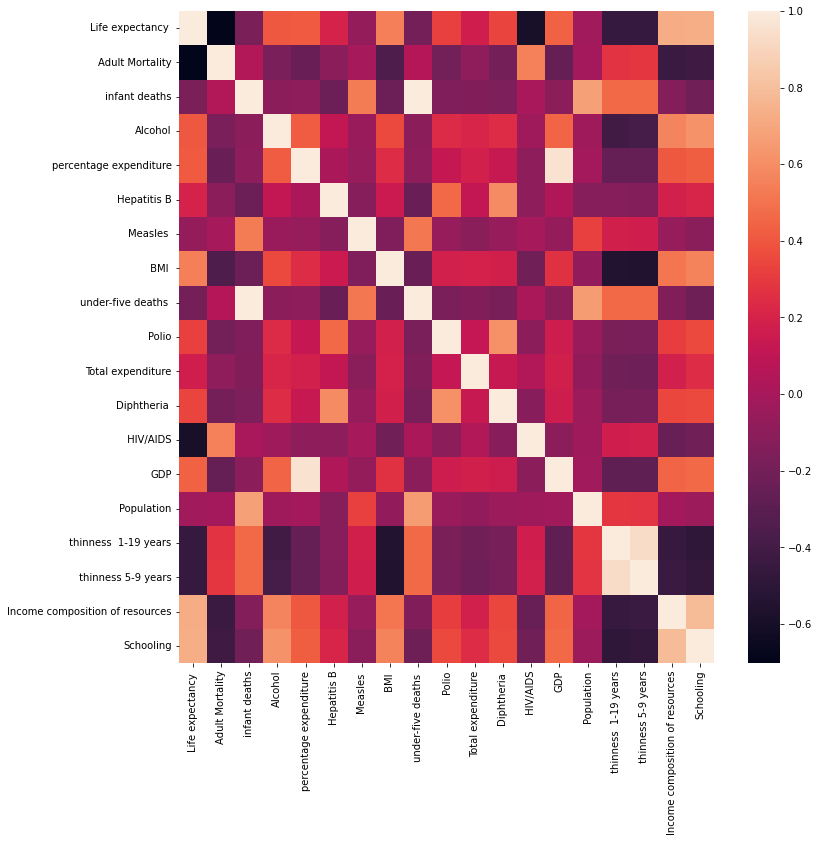

In [16]:
# plot the heatmap
corr = data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [17]:
Life_Expectancy_Data.dtypes

Country                             object
Year                                 int64
Status                               int64
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

Se detectan los outliers

In [18]:
def outlier_count(col, data,booleano):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    if booleano:
      print('Número de outliers: {}'.format(outlier_count))
      print('Porcentaje de la data que es outlier: {}%'.format(outlier_percent))
    else:
      return(min_val,max_val)
for col in data.columns:
  outlier_count(col,data,True)

---------------Life expectancy ---------------
Número de outliers: 39
Porcentaje de la data que es outlier: 2.37%
---------------Adult Mortality---------------
Número de outliers: 54
Porcentaje de la data que es outlier: 3.27%
---------------infant deaths---------------
Número de outliers: 199
Porcentaje de la data que es outlier: 12.07%
---------------Alcohol---------------
Número de outliers: 2
Porcentaje de la data que es outlier: 0.12%
---------------percentage expenditure---------------
Número de outliers: 187
Porcentaje de la data que es outlier: 11.34%
---------------Hepatitis B---------------
Número de outliers: 165
Porcentaje de la data que es outlier: 10.01%
---------------Measles ---------------
Número de outliers: 297
Porcentaje de la data que es outlier: 18.01%
--------------- BMI ---------------
Número de outliers: 0
Porcentaje de la data que es outlier: 0.0%
---------------under-five deaths ---------------
Número de outliers: 222
Porcentaje de la data que es outlier: 13.

# Selección del modelo, métricas y visualización

# Regression Lasso

In [80]:
y = data['Life expectancy '].values
X= data.drop('Life expectancy ',axis=1).values
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

# define model
model = Lasso()
grid = {'alpha':[0,0.01,0.1,0.2,0.3,0.4,1,2,3,4,5]}

# define search
search = GridSearchCV(model, grid)

# perform the search
search.fit(X_train, y_train)
# summarize
print('MAE: %.3f' % search.best_score_)
print('Config: %s' % search.best_params_)

MAE: 0.827
Config: {'alpha': 0.01}


In [81]:
b0 = search.predict(([[10000 for i in range(18)]]))       
print("b0: ", b0)

b1 = search.best_estimator_.coef_
print("b1: ", b1)

b0:  [85244.4848303]
b1:  [-1.68672416e-02  9.74316539e-02 -9.23152604e-02  4.75235033e-04
 -8.21844250e-03 -1.02132540e-05  2.41581759e-02 -7.29029560e-02
  7.38505589e-03  1.09056790e-01  1.62734977e-02 -4.29169580e-01
 -1.18710064e-05  5.51984671e-11 -4.31680044e-02 -5.53997361e-02
  7.93014654e+00  1.05228763e+00]


<AxesSubplot:>

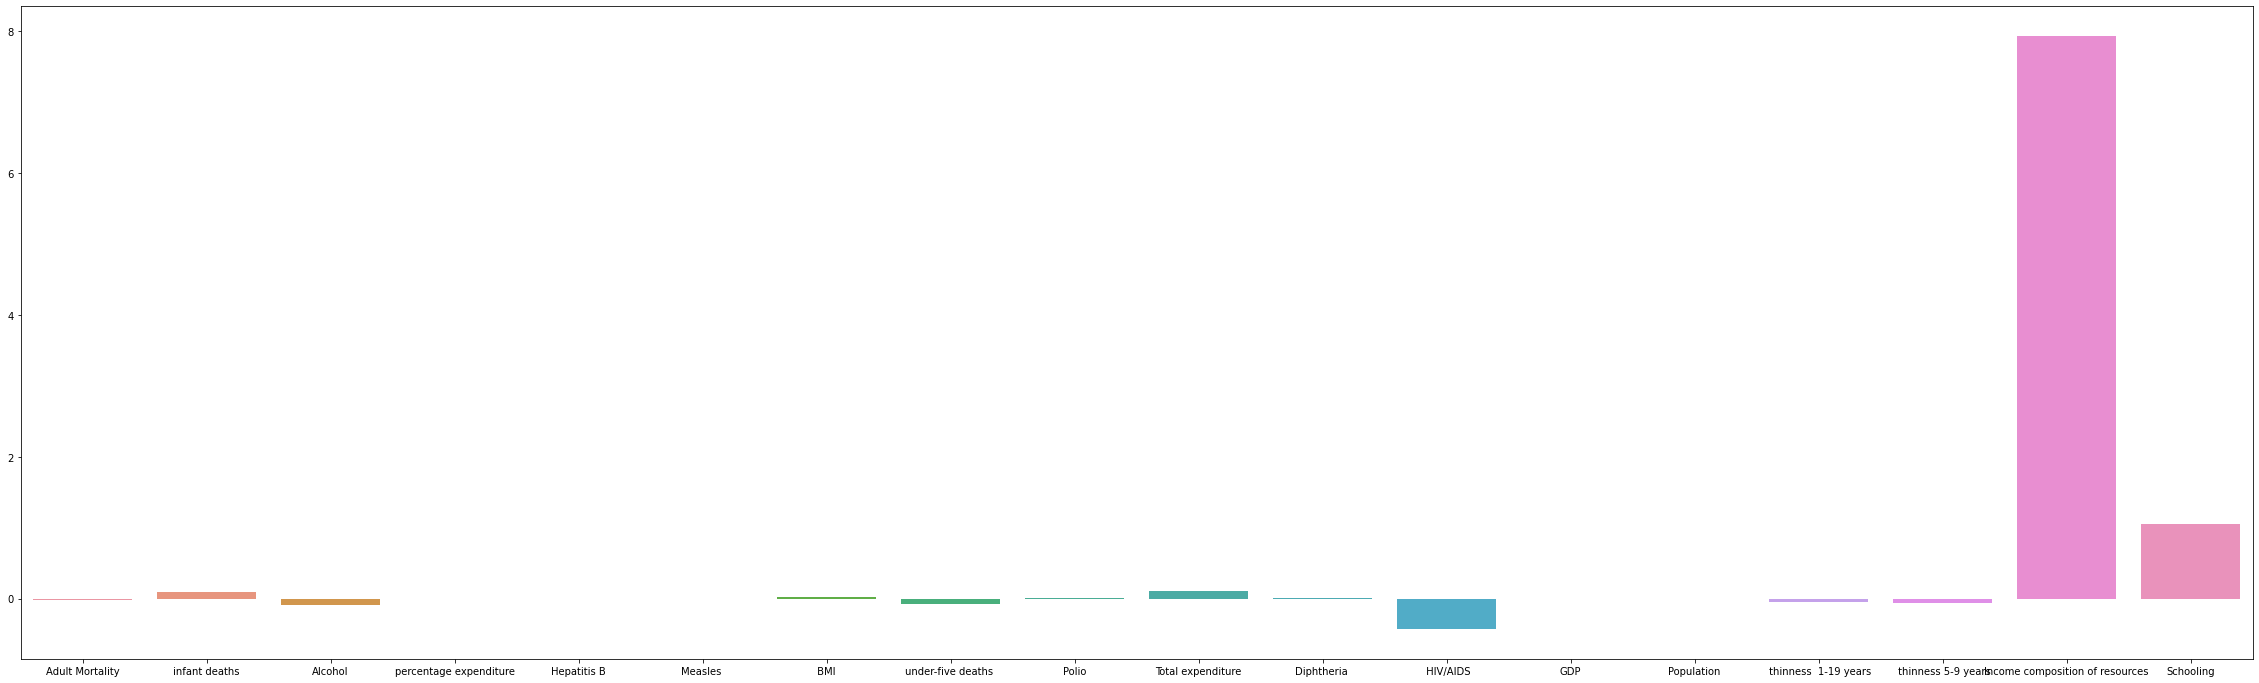

In [82]:
plt.figure(figsize=(40,12))
sns.barplot(x=data.drop('Life expectancy ',axis=1).columns,y=b1)

In [83]:
y_true =  list(y_test)
y_pred_RL = list(search.best_estimator_.predict(X_test))

In [84]:
# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred_RL
        }
)

df_metrics1 = summary_metrics(df_temp)
df_metrics1['r2']=r2_score(y_true,y_pred_RL)
print("\nMetricas para los regresores")
print("")
df_metrics1


Metricas para los regresores



,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
0,2.8538,14.0431,3.7474,0.0428,0.0427,0.0409,0.0422,0.0426,0.812277


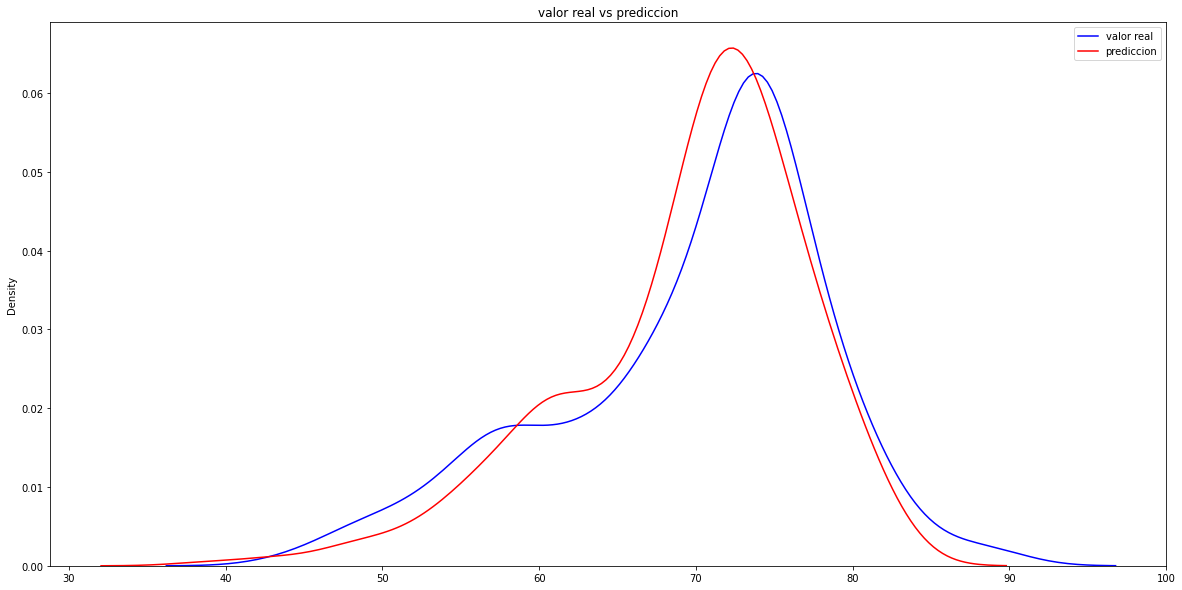

In [85]:
y_pred = y_pred_RL
plt.figure(figsize=(20, 10))

ax = sns.distplot(y_test, hist=False, color="b", label="valor real")
sns.distplot(y_pred, hist=False, color="r", label="prediccion" , ax=ax)

plt.title('valor real vs prediccion')
plt.legend()
plt.show()


# Arbol de decisión

In [86]:
from sklearn.tree import DecisionTreeRegressor
data=Life_Expectancy_Data
data = data.dropna()                                         # same is done 

DTdata = data.copy() 

In [87]:
dtr = DecisionTreeRegressor()           # created model
tree_para = {'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
g_search = GridSearchCV(estimator = dtr,
                        param_grid = tree_para,
                        cv = 5,
                       return_train_score=True)

In [88]:
g_search.fit(X_train,y_train)                # fitted model according to train values

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]},
             return_train_score=True)

In [89]:
g_search.best_params_

{'max_depth': 6}

In [90]:
g_search.best_estimator_

DecisionTreeRegressor(max_depth=6)

In [91]:
y_true =  list(y_test)
y_pred_AD= list(g_search.best_estimator_.predict(X_test))

In [92]:
# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred_AD
        }
)

df_metrics2 = summary_metrics(df_temp)
df_metrics2['r2']=r2_score(y_true,y_pred_AD)
print("\nMetricas para los regresores")
print("")
df_metrics2


Metricas para los regresores



,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
0,1.9156,7.6816,2.7716,0.0283,0.0282,0.0275,0.0279,0.0282,0.897316


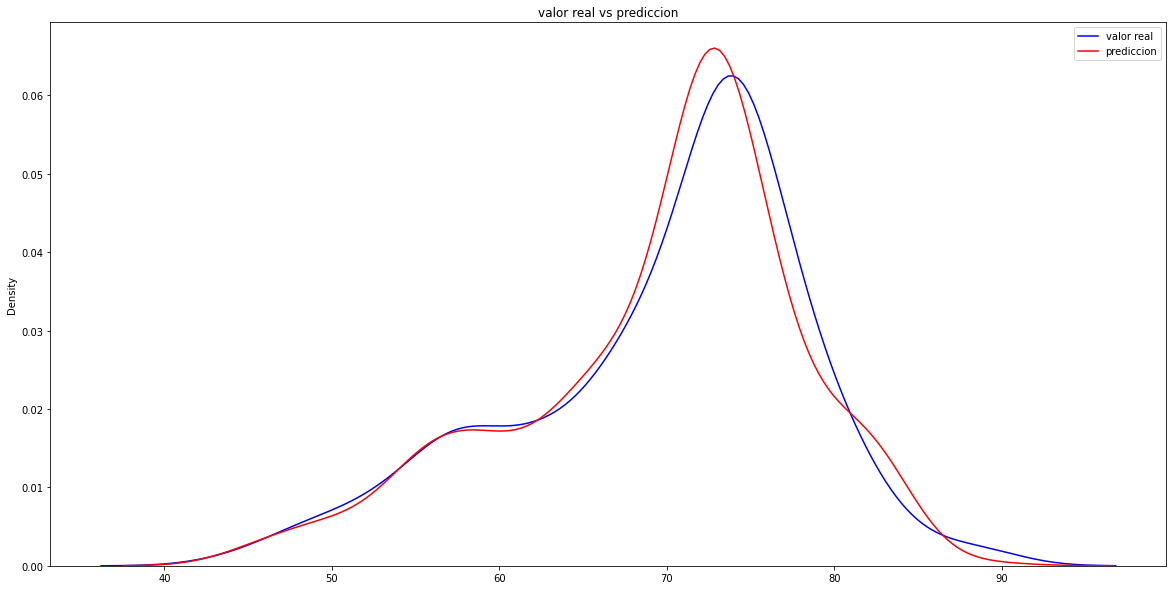

In [93]:
y_pred = y_pred_AD
plt.figure(figsize=(20, 10))

ax = sns.distplot(y_test, hist=False, color="b", label="valor real")
sns.distplot(y_pred, hist=False, color="r", label="prediccion" , ax=ax)

plt.title('valor real vs prediccion')
plt.legend()
plt.show()

# Random Forest

In [94]:
from sklearn.ensemble import RandomForestRegressor           # for our predict model

In [95]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [.25, .5, .75]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [.25, .5, .75]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search_rf = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [0.25, 0.5, 0.75],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False],
                          'max_features': [0.25, 0.5, 0.75],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [96]:
grid_search_rf.best_params_

{'bootstrap': False, 'max_features': 0.5, 'n_estimators': 10}

In [97]:
grid_search_rf.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=0.5, n_estimators=10,
                      random_state=42)

In [98]:
y_true =  list(y_test)
y_pred_RF= list(grid_search_rf.best_estimator_.predict(X_test))

In [99]:
# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred_RF
        }
)

df_metrics3 = summary_metrics(df_temp)
df_metrics3['r2']=r2_score(y_true,y_pred_RF)
print("\nMetricas para los regresores")
print("")
df_metrics3


Metricas para los regresores



,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
0,1.2354,4.0847,2.0211,0.0183,0.0183,0.0177,0.018,0.0183,0.945397


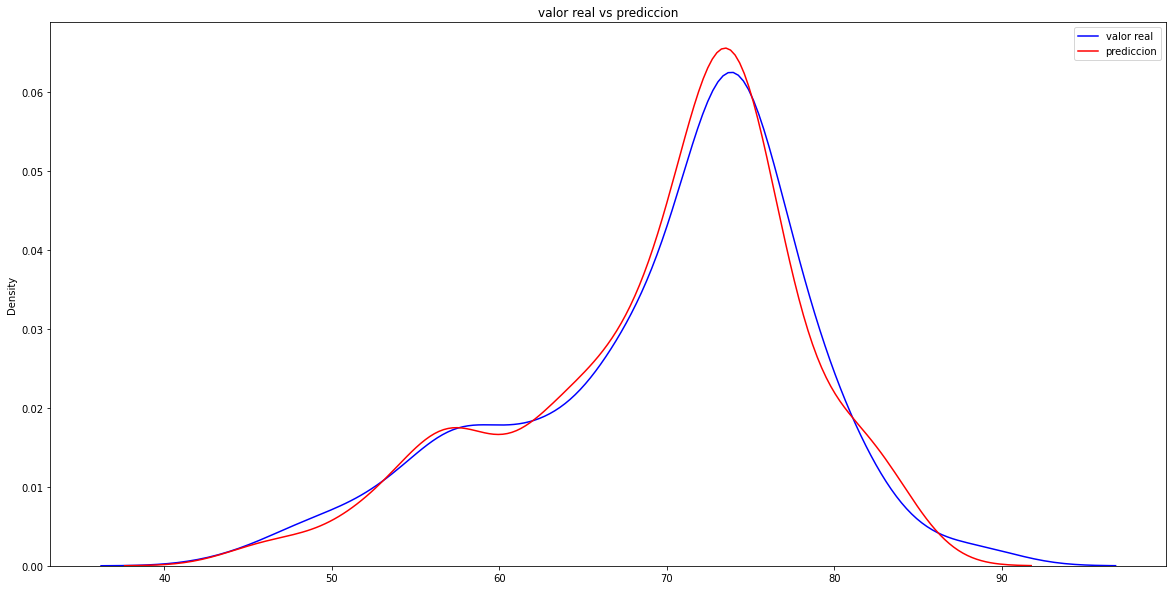

In [100]:
y_pred = y_pred_RF
plt.figure(figsize=(20, 10))

ax = sns.distplot(y_test, hist=False, color="b", label="valor real")
sns.distplot(y_pred, hist=False, color="r", label="prediccion" , ax=ax)

plt.title('valor real vs prediccion')
plt.legend()
plt.show()

# Bayesian Regression

In [101]:
from sklearn import linear_model

In [102]:
bay_reg = linear_model.BayesianRidge()
param_grid={'alpha_1':[0.1,0.2,0.3,0.4,1,2,5],
            'alpha_2':[0.1,0.2,0.3,0.4,1,2,5],
            'lambda_1':[0.1,0.2,0.3,0.4,1,2,5],
            'lambda_2':[0.1,0.2,0.3,0.4,1,2,5]}
grid_bay_reg=GridSearchCV(bay_reg,param_grid,cv=5,)

In [103]:
grid_bay_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BayesianRidge(),
             param_grid={'alpha_1': [0.1, 0.2, 0.3, 0.4, 1, 2, 5],
                         'alpha_2': [0.1, 0.2, 0.3, 0.4, 1, 2, 5],
                         'lambda_1': [0.1, 0.2, 0.3, 0.4, 1, 2, 5],
                         'lambda_2': [0.1, 0.2, 0.3, 0.4, 1, 2, 5]})

In [104]:
grid_bay_reg.best_params_

{'alpha_1': 5, 'alpha_2': 0.1, 'lambda_1': 0.1, 'lambda_2': 5}

In [105]:
grid_bay_reg.best_estimator_

BayesianRidge(alpha_1=5, alpha_2=0.1, lambda_1=0.1, lambda_2=5)

In [106]:
y_true =  list(y_test)
y_pred_BR= list(grid_bay_reg.best_estimator_.predict(X_test))

In [107]:
# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred_BR
        }
)

df_metrics4 = summary_metrics(df_temp)
df_metrics4['r2']=r2_score(y_true,y_pred_BR)
print("\nMetricas para los regresores")
print("")
df_metrics4


Metricas para los regresores



,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
0,2.869,14.163,3.7634,0.043,0.0429,0.0411,0.0424,0.0428,0.810674


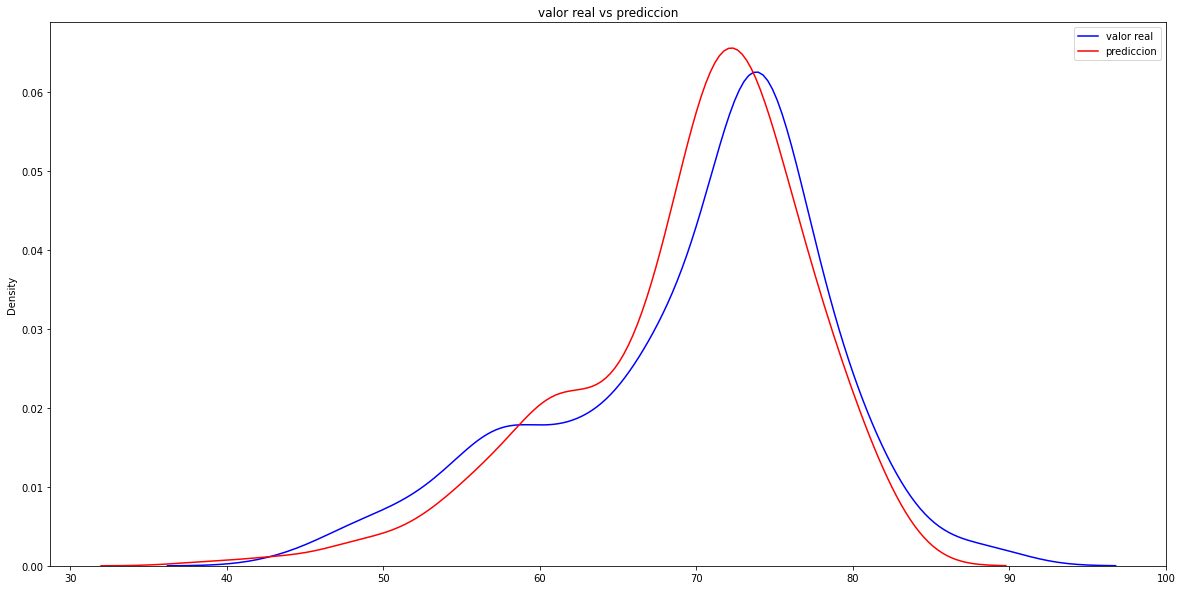

In [108]:
y_pred = y_pred_BR
plt.figure(figsize=(20, 10))

ax = sns.distplot(y_test, hist=False, color="b", label="valor real")
sns.distplot(y_pred, hist=False, color="r", label="prediccion" , ax=ax)

plt.title('valor real vs prediccion')
plt.legend()
plt.show()

In [109]:
comparacion = []
comparacion.append(df_metrics1)
comparacion.append(df_metrics2)
comparacion.append(df_metrics3)
comparacion.append(df_metrics4)
comparacion = pd.concat(comparacion)
comparacion['Modelo'] = ['Regresion Lasso','Arbol de decision','Random forest','Regresion bayesiana']
comparacion

,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2,Modelo
0,2.8538,14.0431,3.7474,0.0428,0.0427,0.0409,0.0422,0.0426,0.812277,Regresion Lasso
0,1.9156,7.6816,2.7716,0.0283,0.0282,0.0275,0.0279,0.0282,0.897316,Arbol de decision
0,1.2354,4.0847,2.0211,0.0183,0.0183,0.0177,0.0180,0.0183,0.945397,Random forest
0,2.8690,14.1630,3.7634,0.0430,0.0429,0.0411,0.0424,0.0428,0.810674,Regresion bayesiana


# Análisis de resultados y visualización del modelo

In [119]:
from sklearn.ensemble import RandomForestRegressor           # for our predict model

In [120]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [121]:
y = data['Life expectancy '].values
X= data.drop(['Life expectancy ','Hepatitis B','Alcohol',' thinness  1-19 years',' thinness 5-9 years','Country'],axis=1).values
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [122]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [.25, .5, .75]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [.25, .5, .75]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search_rf = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [0.25, 0.5, 0.75],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False],
                          'max_features': [0.25, 0.5, 0.75],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [123]:
grid_search_rf.best_params_

{'max_features': 0.75, 'n_estimators': 30}

In [124]:
grid_search_rf.best_estimator_

RandomForestRegressor(max_features=0.75, n_estimators=30, random_state=42)

In [125]:
y_true =  list(y_test)
y_pred_RF= list(grid_search_rf.best_estimator_.predict(X_test))

In [126]:
# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred_RF
        }
)

df_metrics = summary_metrics(df_temp)
df_metrics['r2']=r2_score(y_true,y_pred_RF)
print("\nMetricas para los regresores")
print("")
df_metrics


Metricas para los regresores



,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
0,1.3097,4.2932,2.072,0.0195,0.0194,0.0188,0.0192,0.0195,0.94261


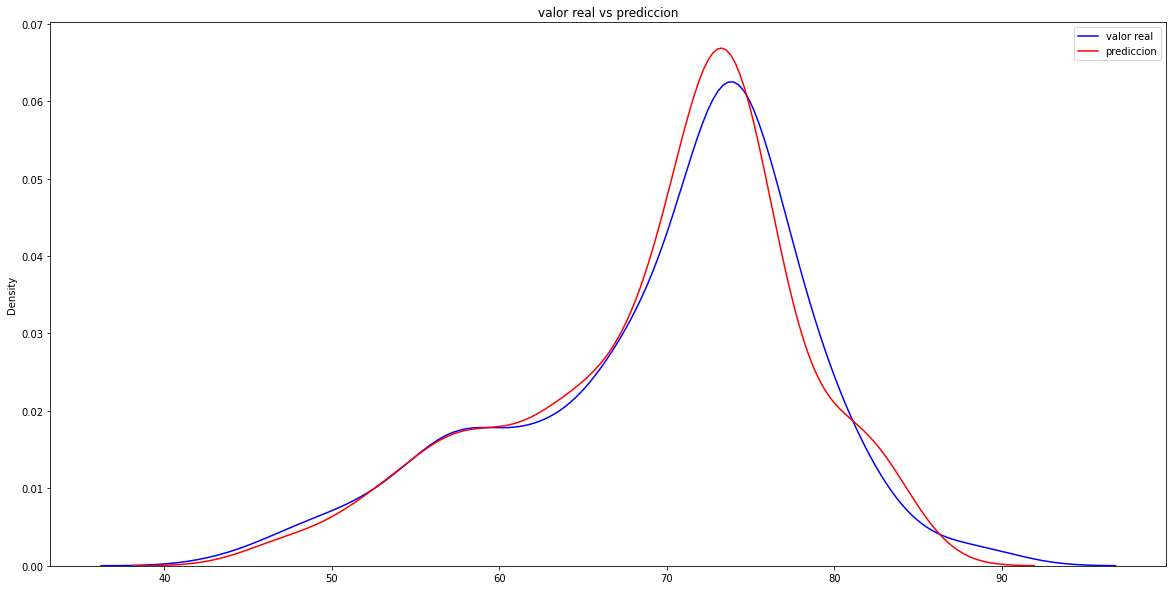

In [127]:
y_pred = y_pred_RF
plt.figure(figsize=(20, 10))

ax = sns.distplot(y_test, hist=False, color="b", label="valor real")
sns.distplot(y_pred, hist=False, color="r", label="prediccion" , ax=ax)

plt.title('valor real vs prediccion')
plt.legend()
plt.show()

Vemos que existen variables que no afectan en el modelo, esto podemos revisarlo con las métricas

¿Debería un país con un valor de esperanza de vida inferior (<65) aumentar su gasto sanitario para mejorar su esperanza de vida media?

In [57]:
data_auxiliar=data.copy()

In [58]:
data_auxiliar

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,0,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,0,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,0,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,0,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [131]:
df_65=data_auxiliar[data['Life expectancy ']<65].drop(['Country','Year','Status'],axis=1)
df_65_2=data_auxiliar[data['Life expectancy ']<65].drop(['Country','Year','Status'],axis=1).copy()
df_65_2['Total expenditure']=2*df_65_2['Total expenditure']

In [132]:
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [0.25, 0.5, 0.75],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False],
                          'max_features': [0.25, 0.5, 0.75],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [133]:
df_65.shape

(439, 19)

In [134]:
y = df_65['Life expectancy '].values
X= df_65.drop(['Life expectancy '],axis=1).values
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [135]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [.25, .5, .75]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [.25, .5, .75]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search_rf = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [0.25, 0.5, 0.75],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False],
                          'max_features': [0.25, 0.5, 0.75],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [136]:
y_true =  list(df_65_2['Life expectancy '].values)
y_pred_RF_aux= list(grid_search_rf.best_estimator_.predict(df_65.drop('Life expectancy ',axis=1).values))

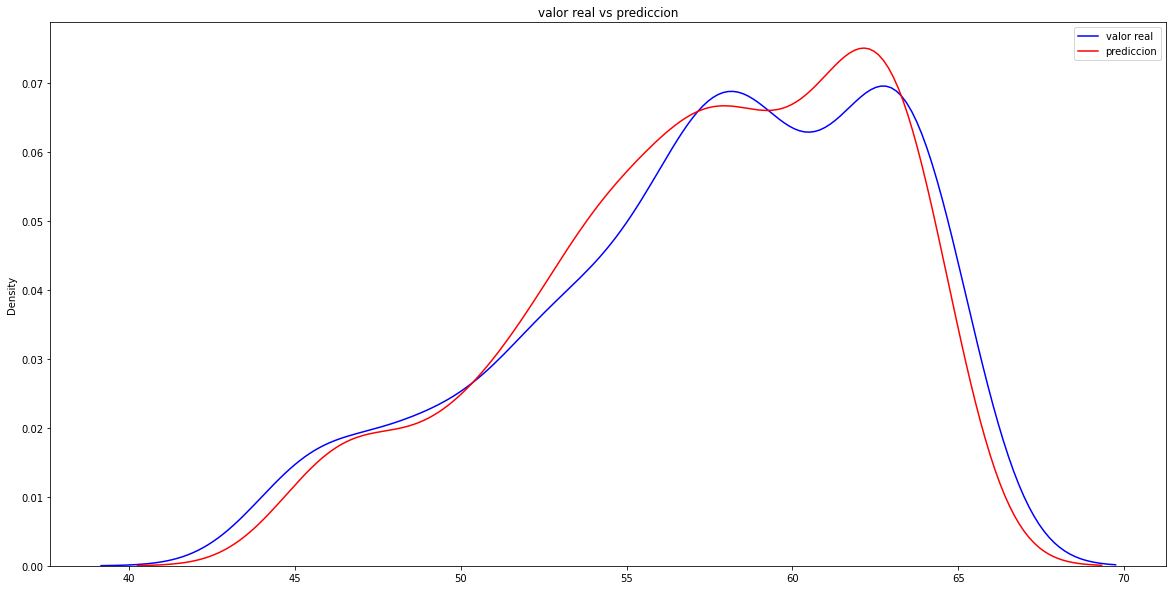

In [137]:
y_pred = y_pred_RF_aux
plt.figure(figsize=(20, 10))

ax = sns.distplot(y_true, hist=False, color="b", label="valor real")
sns.distplot(y_pred, hist=False, color="r", label="prediccion" , ax=ax)

plt.title('valor real vs prediccion')
plt.legend()
plt.show()

A pesar de que se duplica el gasto en salud, la expecativa de vida no cambia

¿Cómo afectan las tasas de mortalidad de lactantes y adultos a la esperanza de vida?

In [138]:
df_adulto=data.drop(["Country",'Year','Status'],axis=1).copy()
df_niño=data.drop(["Country",'Year','Status'],axis=1).copy()
df_niño['infant deaths']=2*df_niño['infant deaths']
df_adulto['Adult Mortality']=2*df_adulto['Adult Mortality']

In [139]:
data=data.drop(['Country', 'Year', 'Status'],axis=1)

In [140]:
y = data['Life expectancy '].values
X= data.drop(['Life expectancy '],axis=1).values
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [141]:
data.columns

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [142]:

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [.25, .5, .75]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [.25, .5, .75]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search_rf = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [0.25, 0.5, 0.75],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False],
                          'max_features': [0.25, 0.5, 0.75],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [143]:
df_niño.columns

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [144]:
y_true =  list(df_niño['Life expectancy '])
y_pred_RF_aux= list(grid_search_rf.best_estimator_.predict(df_niño.drop('Life expectancy ',axis=1).values))

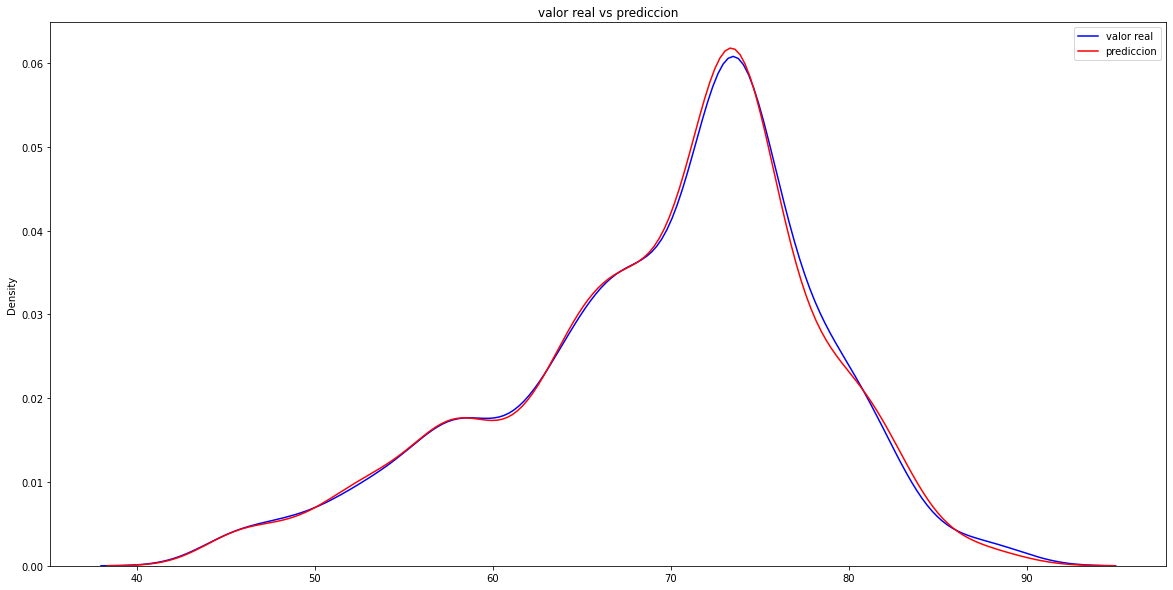

In [145]:
y_pred = y_pred_RF_aux
plt.figure(figsize=(20, 10))

ax = sns.distplot(y_true, hist=False, color="b", label="valor real")
sns.distplot(y_pred, hist=False, color="r", label="prediccion" , ax=ax)

plt.title('valor real vs prediccion')
plt.legend()
plt.show()

In [146]:
y_true =  list(df_adulto['Life expectancy '])
y_pred_RF_aux= list(grid_search_rf.best_estimator_.predict(df_adulto.drop('Life expectancy ',axis=1).values))

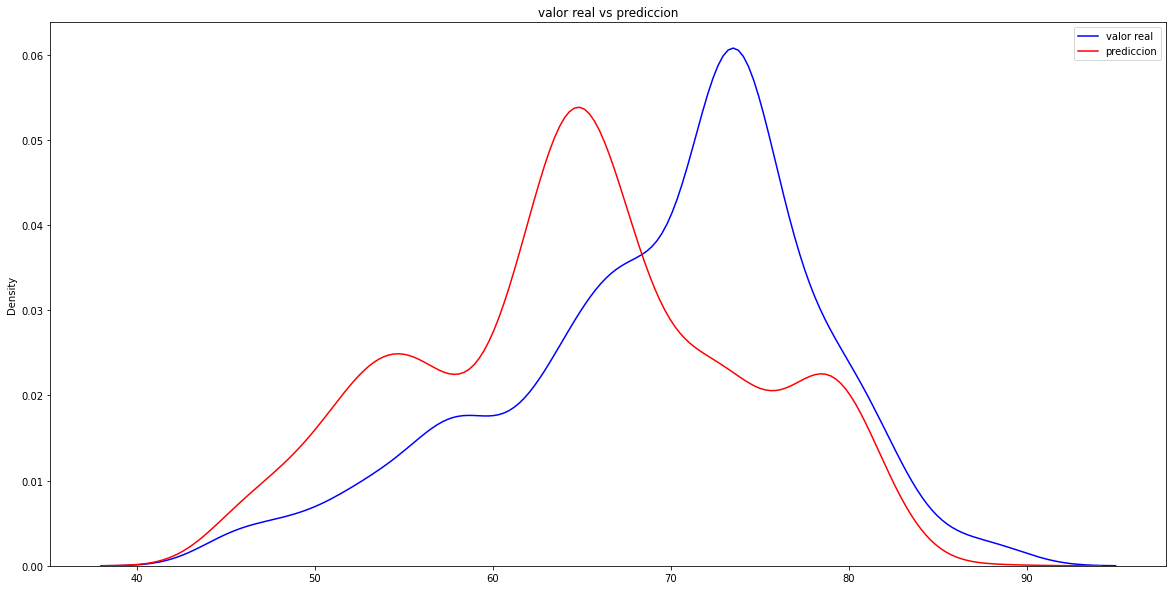

In [147]:
y_pred = y_pred_RF_aux
plt.figure(figsize=(20, 10))

ax = sns.distplot(y_true, hist=False, color="b", label="valor real")
sns.distplot(y_pred, hist=False, color="r", label="prediccion" , ax=ax)

plt.title('valor real vs prediccion')
plt.legend()
plt.show()

Podemos ver que la muerte de lactantes no afecta a las predicciones pero considerando la muerte de adultos la esperanza de vida baja considerablemente, esto se debe a que las edades adultas estan entre la esperanza de vida pues los lactantes no son tan considerados dentro de la esperanza de vida debido a su corta edad.

¿Tiene la esperanza de vida una correlación positiva o negativa con los estilos de vida?

In [148]:
data.columns

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [152]:
df_alcohol=data.copy()
df_alcohol['Alcohol']=2*df_alcohol['Alcohol']

In [153]:
y_true =  list(df_alcohol['Life expectancy '])
y_pred_RF_aux= list(grid_search_rf.best_estimator_.predict(df_alcohol.drop('Life expectancy ',axis=1).values))

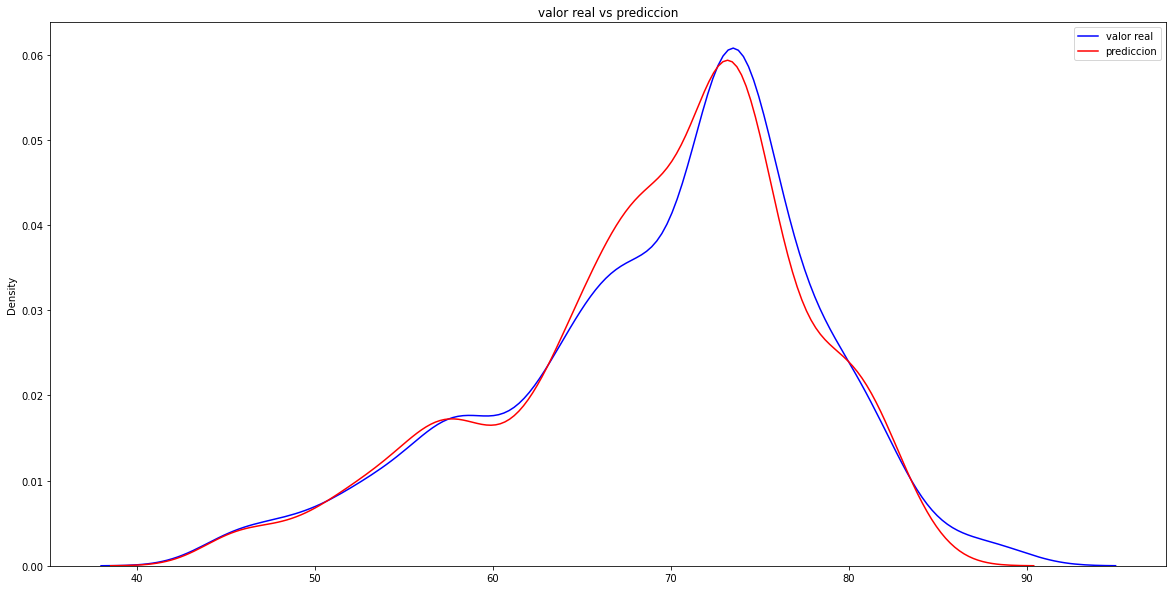

In [154]:
y_pred = y_pred_RF_aux
plt.figure(figsize=(20, 10))

ax = sns.distplot(y_true, hist=False, color="b", label="valor real")
sns.distplot(y_pred, hist=False, color="r", label="prediccion" , ax=ax)

plt.title('valor real vs prediccion')
plt.legend()
plt.show()

Vemos que el consumo de alcohol no afecta directamente a la esperanza de vida

In [155]:
data.columns

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [158]:
df_BMI=data.copy()
df_BMI[' BMI ']=2*df_BMI[' BMI ']

In [159]:
y_true =  list(df_BMI['Life expectancy '])
y_pred_RF_aux= list(grid_search_rf.best_estimator_.predict(df_BMI.drop('Life expectancy ',axis=1).values))

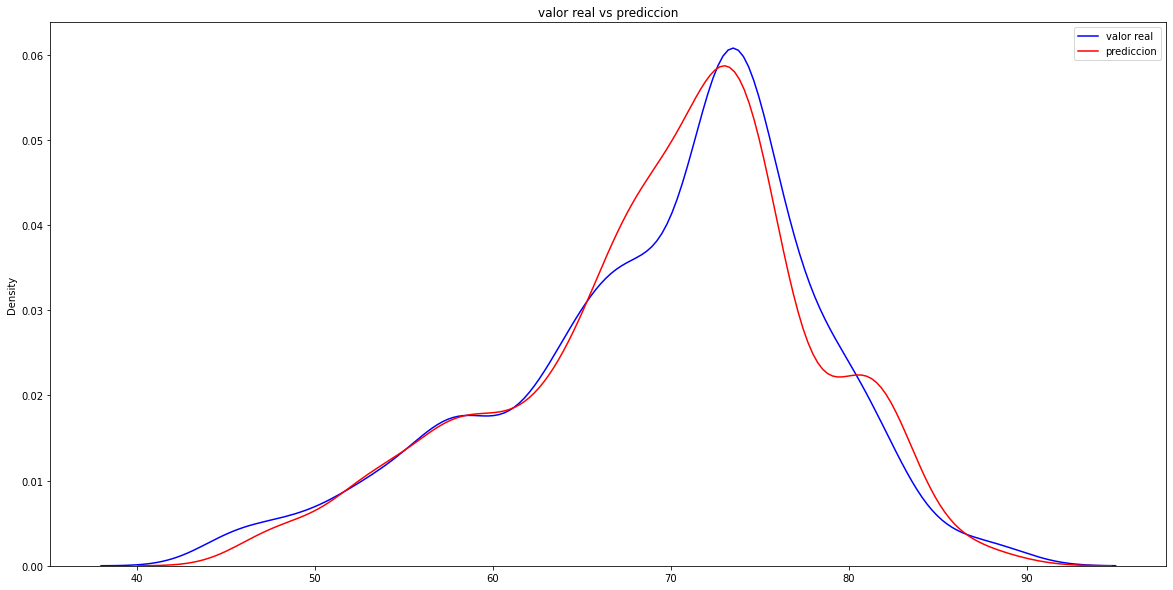

In [160]:
y_pred = y_pred_RF_aux
plt.figure(figsize=(20, 10))

ax = sns.distplot(y_true, hist=False, color="b", label="valor real")
sns.distplot(y_pred, hist=False, color="r", label="prediccion" , ax=ax)

plt.title('valor real vs prediccion')
plt.legend()
plt.show()

Aumentar el BMI genera una pequeña variación 

La correlacion entre la delgadez y la esperanza de vida no es significante, por lo que vimos antes

# Conclusiones

Como primera conclusión según la matriz de correlación hay variables que no influyen en la expctativa de vida, como por ejemplo la Mortalidad adulta, el índica de VIH, la muerte de niños y la delagadez de las personas, podemos verificarlo en el mejor modelo sacando estas variables y revisando las métricas

El modelo que mejor resultados entregó fue el modelo de Random Forest seguido de Árbol de decisión, regresión LASSO y regresión Bayesiana. por lo que se decidió usar Random Forest y se entrenó el modelo sin las variables que no aportan.


Finalmente, algunas variables que se pueden manejar de manera distinta son el manejo de datos nulos o el manejo de outliers.